
# Základy korelace – sinusoidy a šum


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Nápočet hodnot
Inicializjeme náhodný generátor pro reprodukovatelnost výsledků a vytvoříme časovou osu `n = 1000`.

Napočítáme si potřebné signály: základní sinusoidu, kosinusoidu posunutou o 90°, dvě sinusoidy se šumem a dva čisté šumy. 
Vše se ukládá do DataFrame `df`.

In [10]:
np.random.seed(42)
periods = 10
n = 1000
t = np.linspace(0, 2*np.pi*periods, n)

s_base = np.sin(t)
s_in_phase = np.sin(t)
s_anti_phase = -np.sin(t)
s_quadrature = np.cos(t)
noise1 = np.random.normal(0, 0.4, size=n)
noise2 = np.random.normal(0, 0.8, size=n)
s_noisy_1 = np.sin(t) + noise1
s_noisy_2 = np.sin(t) + noise2

df = pd.DataFrame({
    "sin_base": s_base,
    "sin_in_phase": s_in_phase,
    "sin_anti_phase": s_anti_phase,
    "sin_vs_cos_90deg": s_quadrature,
    "sin_noisy_1": s_noisy_1,
    "sin_noisy_2": s_noisy_2,
    "noise1": noise1,
    "noise2": noise2,
}, index=t)
df.head()


,sin_base,sin_in_phase,sin_anti_phase,sin_vs_cos_90deg,sin_noisy_1,sin_noisy_2,noise1,noise2
0.000000,0.000000,0.000000,-0.000000,1.000000,0.198686,1.119484,0.198686,1.119484
0.062895,0.062853,0.062853,-0.062853,0.998023,0.007548,0.802560,-0.055306,0.739707
0.125789,0.125458,0.125458,-0.125458,0.992099,0.384533,0.173162,0.259075,0.047704
0.188684,0.187567,0.187567,-0.187567,0.982252,0.796779,-0.329983,0.609212,-0.517549
0.251579,0.248934,0.248934,-0.248934,0.968521,0.155272,0.807512,-0.093661,0.558579


## 2x Sinus ve fázi

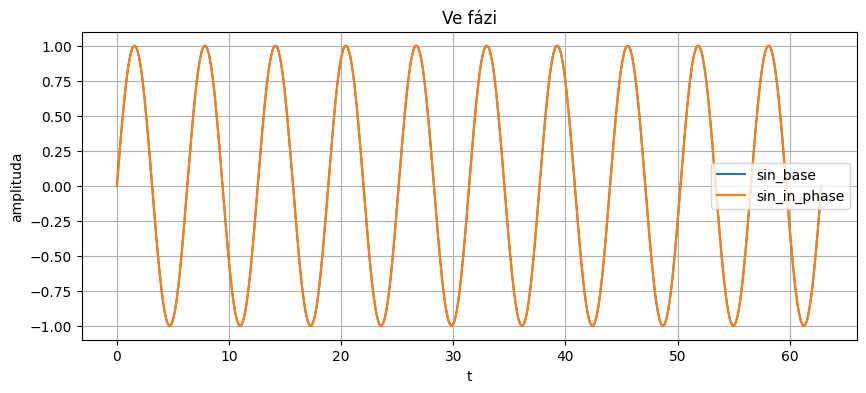

In [3]:
plt.figure(figsize=(10,4))
plt.plot(df.index, df["sin_base"], label="sin_base")
plt.plot(df.index, df["sin_in_phase"], label="sin_in_phase")
plt.title("Ve fázi")
plt.xlabel("t"); plt.ylabel("amplituda")
plt.legend(); plt.grid(True); plt.show()


Všimnete si že se oba signály perfektně překrývají. Jaký bude jejich korelační koeficient?

In [19]:
funkce = ["sin_base", "sin_in_phase"]
cor_value = df[funkce].corr().iloc[0, 1]
print(f"Porovnáváme funkce: {funkce[0]} a {funkce[1]}")
print(f"Korelační koeficient: {cor_value:.2f}")

Porovnáváme funkce: sin_base a sin_in_phase
Korelační koeficient: 1.00


## Sinus v protifázi

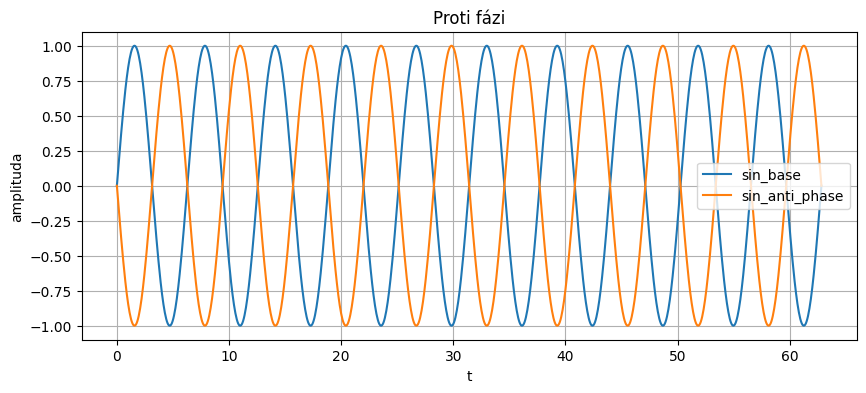

In [4]:

plt.figure(figsize=(10,4))
plt.plot(df.index, df["sin_base"], label="sin_base")
plt.plot(df.index, df["sin_anti_phase"], label="sin_anti_phase")
plt.title("Proti fázi")
plt.xlabel("t"); plt.ylabel("amplituda")
plt.legend(); plt.grid(True); plt.show()


In [20]:
funkce = ["sin_base", "sin_anti_phase"]
cor_value = df[funkce].corr().iloc[0, 1]
print(f"Porovnáváme funkce: {funkce[0]} a {funkce[1]}")
print(f"Korelační koeficient: {cor_value:.2f}")

Porovnáváme funkce: sin_base a sin_anti_phase
Korelační koeficient: -1.00


## Posunuté signály o $\pi/2$

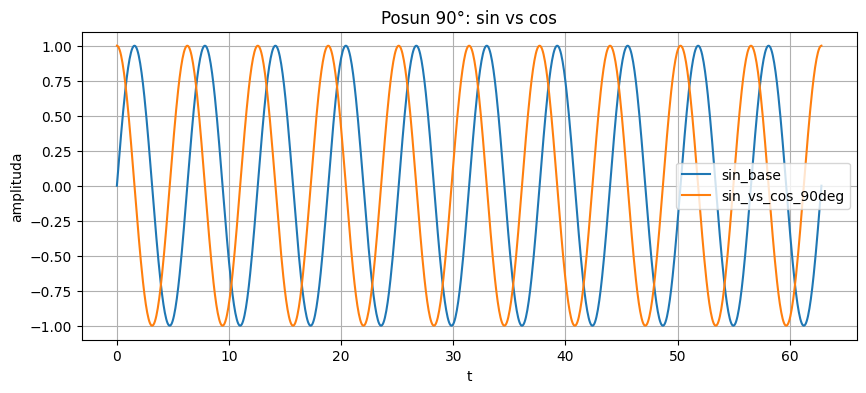

In [21]:

plt.figure(figsize=(10,4))
plt.plot(df.index, df["sin_base"], label="sin_base")
plt.plot(df.index, df["sin_vs_cos_90deg"], label="sin_vs_cos_90deg")
plt.title("Posun 90°: sin vs cos")
plt.xlabel("t"); plt.ylabel("amplituda")
plt.legend(); plt.grid(True); plt.show()


In [27]:
funkce = ["sin_base", "sin_vs_cos_90deg"]
cor_value = df[funkce].corr().iloc[0, 1]
print(f"Porovnáváme funkce: {funkce[0]} a {funkce[1]}")
print(f"Korelační koeficient: {cor_value:.2f}")

Porovnáváme funkce: sin_base a sin_vs_cos_90deg
Korelační koeficient: -0.00


## Přidání šumu

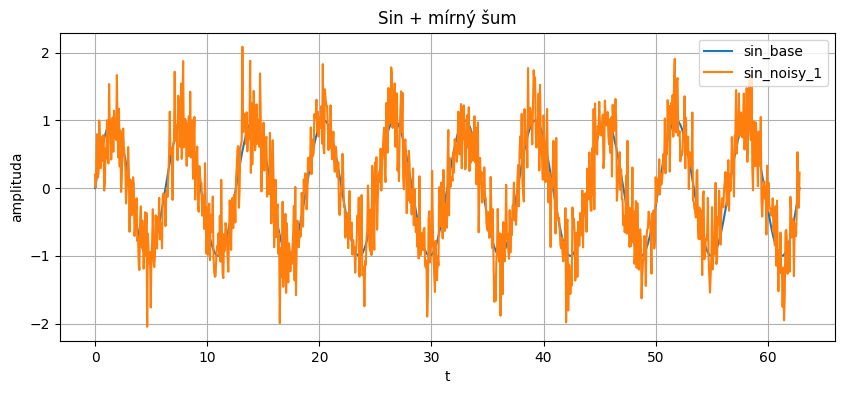

In [22]:

plt.figure(figsize=(10,4))
plt.plot(df.index, df["sin_base"], label="sin_base")
plt.plot(df.index, df["sin_noisy_1"], label="sin_noisy_1")
plt.title("Sin + mírný šum")
plt.xlabel("t"); plt.ylabel("amplituda")
plt.legend(); plt.grid(True); plt.show()


In [29]:
funkce = ["sin_base", "sin_noisy_1"]
cor_value = df[funkce].corr().iloc[0, 1]
print(f"Porovnáváme funkce: {funkce[0]} a {funkce[1]}")
print(f"Korelační koeficient: {cor_value:.2f}")

Porovnáváme funkce: sin_base a sin_noisy_1
Korelační koeficient: 0.87


## Více šumu

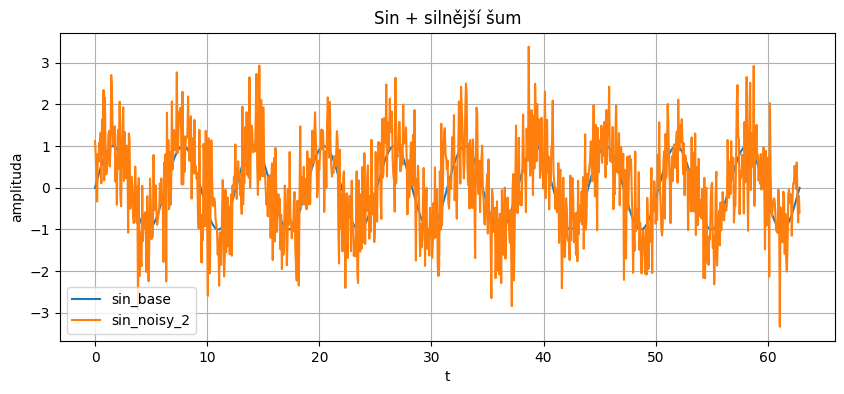

In [23]:

plt.figure(figsize=(10,4))
plt.plot(df.index, df["sin_base"], label="sin_base")
plt.plot(df.index, df["sin_noisy_2"], label="sin_noisy_2")
plt.title("Sin + silnější šum")
plt.xlabel("t"); plt.ylabel("amplituda")
plt.legend(); plt.grid(True); plt.show()


In [30]:
funkce = ["sin_base", "sin_noisy_2"]
cor_value = df[funkce].corr().iloc[0, 1]
print(f"Porovnáváme funkce: {funkce[0]} a {funkce[1]}")
print(f"Korelační koeficient: {cor_value:.2f}")

Porovnáváme funkce: sin_base a sin_noisy_2
Korelační koeficient: 0.68


Čím více šumu přidáme, tím více se signály odchylují od původní sinusoidy. Korelační koeficient se snižuje.

## Porovnání čistého šumu

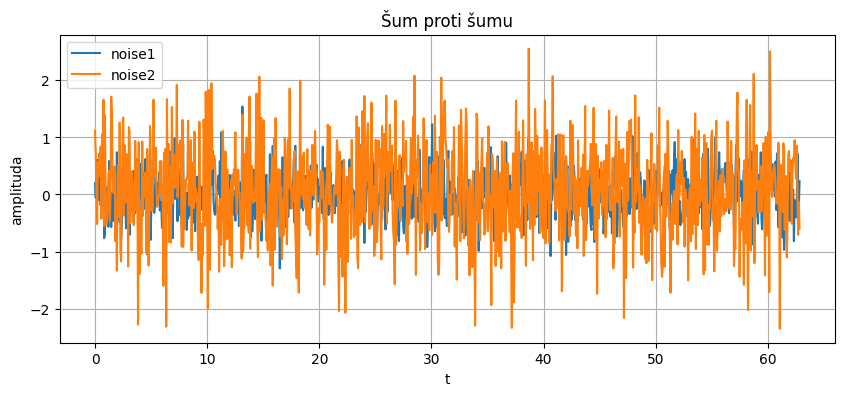

In [32]:
plt.figure(figsize=(10,4))
plt.plot(df.index, df["noise1"], label="noise1")
plt.plot(df.index, df["noise2"], label="noise2")
plt.title("Šum proti šumu")
plt.xlabel("t"); plt.ylabel("amplituda")
plt.legend(); plt.grid(True); plt.show()

In [33]:
funkce = ["noise1", "noise2"]
cor_value = df[funkce].corr().iloc[0, 1]
print(f"Porovnáváme funkce: {funkce[0]} a {funkce[1]}")
print(f"Korelační koeficient: {cor_value:.2f}")

Porovnáváme funkce: noise1 a noise2
Korelační koeficient: -0.04


Singály na sobě nijak nezávisí, korelační koeficient je proto blízko nule.

## Korelační matice

In [28]:
corr = df.corr()
corr

,sin_base,sin_in_phase,sin_anti_phase,sin_vs_cos_90deg,sin_noisy_1,sin_noisy_2,noise1,noise2
sin_base,1.000000e+00,1.000000e+00,-1.000000e+00,-1.054165e-17,0.870564,0.680573,-0.037276,0.041924
sin_in_phase,1.000000e+00,1.000000e+00,-1.000000e+00,-1.054165e-17,0.870564,0.680573,-0.037276,0.041924
sin_anti_phase,-1.000000e+00,-1.000000e+00,1.000000e+00,1.054165e-17,-0.870564,-0.680573,0.037276,-0.041924
sin_vs_cos_90deg,-1.054165e-17,-1.054165e-17,1.054165e-17,1.000000e+00,0.030464,0.008995,0.061868,0.012266
sin_noisy_1,8.705641e-01,8.705641e-01,-8.705641e-01,3.046383e-02,1.000000,0.578458,0.459262,0.017375
sin_noisy_2,6.805726e-01,6.805726e-01,-6.805726e-01,8.994911e-03,0.578458,1.000000,-0.053849,0.760569
noise1,-3.727628e-02,-3.727628e-02,3.727628e-02,6.186841e-02,0.459262,-0.053849,1.000000,-0.040400
noise2,4.192428e-02,4.192428e-02,-4.192428e-02,1.226592e-02,0.017375,0.760569,-0.040400,1.000000


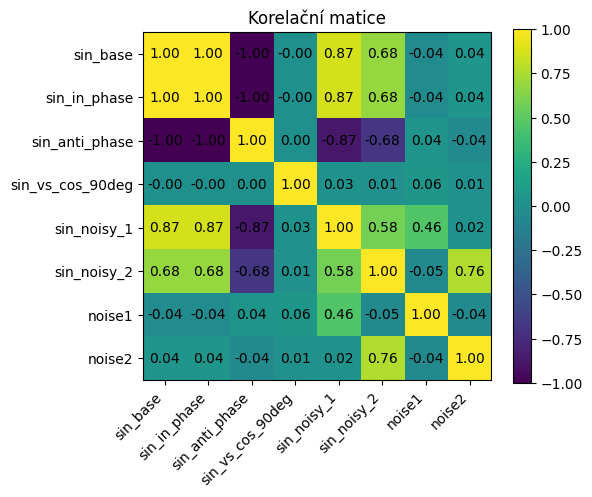

In [26]:
plt.figure(figsize=(6,5))
im = plt.imshow(corr.values, vmin=-1, vmax=1)
plt.colorbar(im)
plt.title("Korelační matice")
plt.xticks(range(len(corr.columns)), corr.columns, rotation=45, ha="right")
plt.yticks(range(len(corr.index)), corr.index)
for i in range(len(corr.index)):
    for j in range(len(corr.columns)):
        plt.text(j, i, f"{corr.values[i,j]:.2f}", ha="center", va="center")
plt.tight_layout(); plt.show()

Na diagonále jsou vždy hodnoty 1, protože každý signál je perfektně korelován sám se sebou. Ostatní hodnoty ukazují vzájemnou korelaci mezi různými signály.